In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./data/_data.csv', index_col=0)
df.head(5)

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


In [6]:
df['Первая_площадь'] = df['Площадь, м2'].str.split('/').str[0]
df['Первая_площадь'] = pd.to_numeric(df['Первая_площадь'])
df['Количество_комнат_без_типов'] = df['Количество комнат'].str.split(',').str[0]
df['Количество_комнат_без_типов'] = pd.to_numeric(df['Количество_комнат_без_типов'])

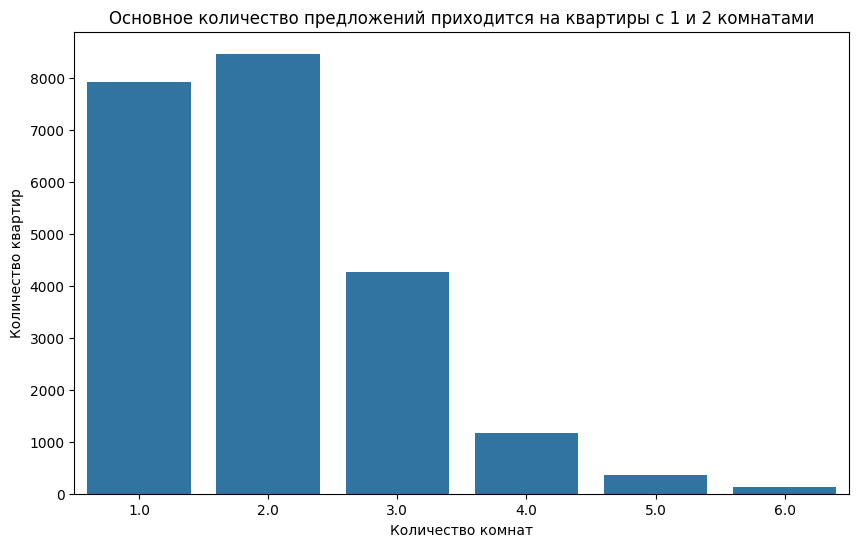

In [7]:
plt.figure(figsize=(10, 6))
room_counts = df['Количество_комнат_без_типов'].value_counts().sort_index()
sns.barplot(x=room_counts.index, y=room_counts.values)
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.title('Основное количество предложений приходится на квартиры с 1 и 2 комнатами');

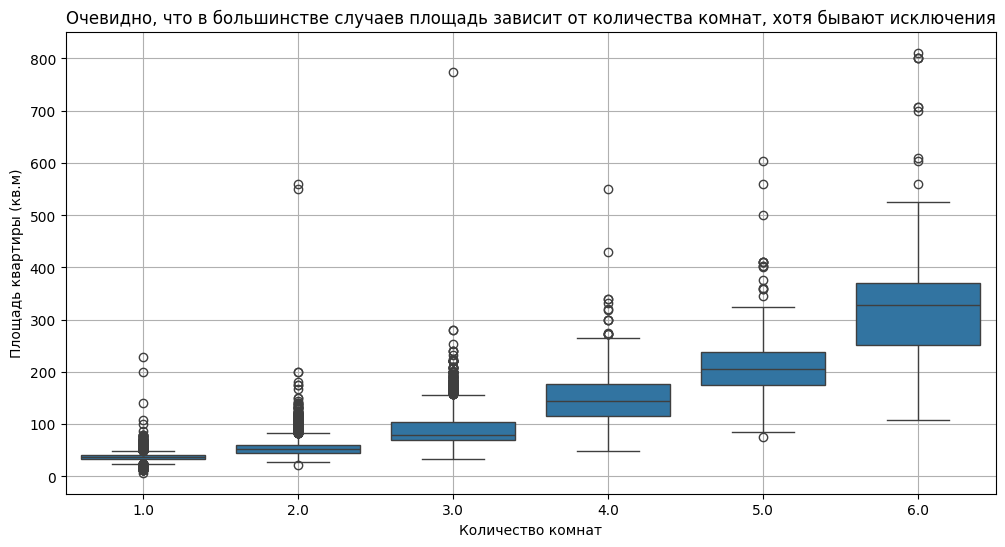

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Количество_комнат_без_типов', y='Первая_площадь')
plt.title('Очевидно, что в большинстве случаев площадь зависит от количества комнат, хотя бывают исключения')
plt.xlabel('Количество комнат')
plt.ylabel('Площадь квартиры (кв.м)')
plt.grid(True)

In [9]:
def remove_outliers(group, column):
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]

df_cleaned = df.groupby('Количество_комнат_без_типов').apply(remove_outliers, 'Первая_площадь').reset_index(drop=True)

/tmp/ipykernel_78396/3646176337.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cleaned = df.groupby('Количество_комнат_без_типов').apply(remove_outliers, 'Первая_площадь').reset_index(drop=True)


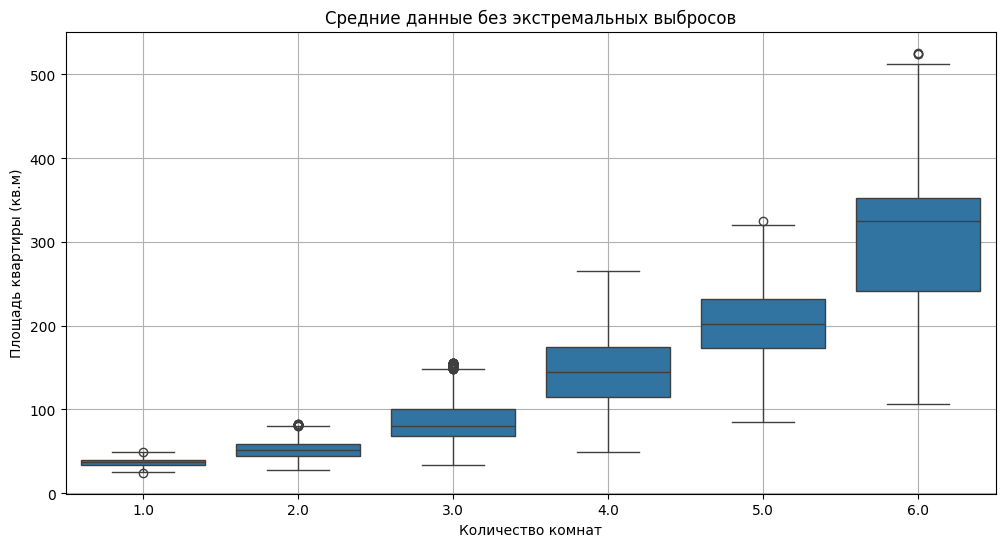

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Количество_комнат_без_типов', y='Первая_площадь')
plt.title('Средние данные без экстремальных выбросов')
plt.xlabel('Количество комнат')
plt.ylabel('Площадь квартиры (кв.м)')
plt.grid(True)

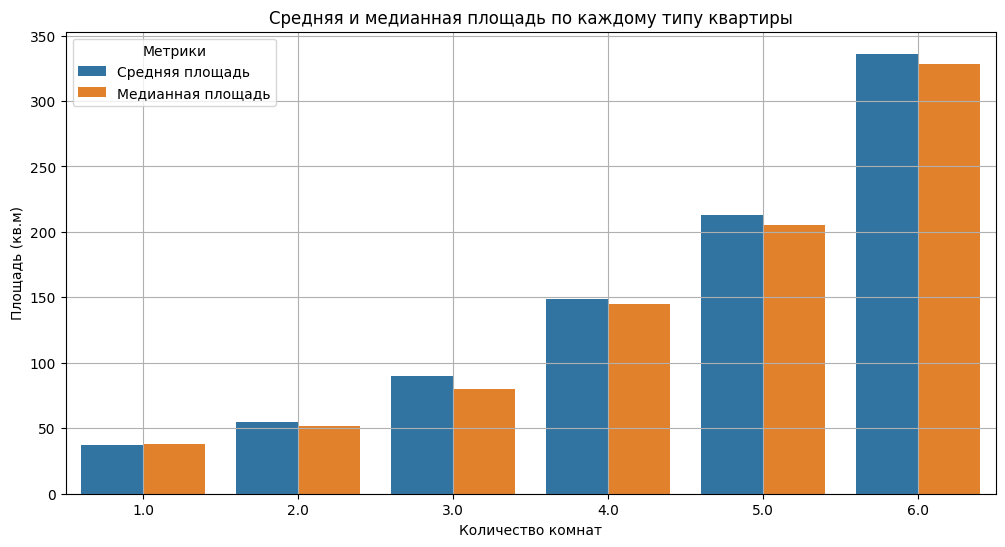

In [11]:
mean_values = df.groupby('Количество_комнат_без_типов')['Первая_площадь'].mean()
median_values = df.groupby('Количество_комнат_без_типов')['Первая_площадь'].median()

summary_df = pd.DataFrame({
    'Средняя площадь': mean_values,
    'Медианная площадь': median_values
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Количество_комнат_без_типов', y='value', hue='Метрики', 
            data=pd.melt(summary_df, id_vars='Количество_комнат_без_типов', value_vars=['Средняя площадь', 'Медианная площадь'], var_name='Метрики'))
plt.title('Средняя и медианная площадь по каждому типу квартиры')
plt.xlabel('Количество комнат')
plt.ylabel('Площадь (кв.м)')

plt.grid(True)

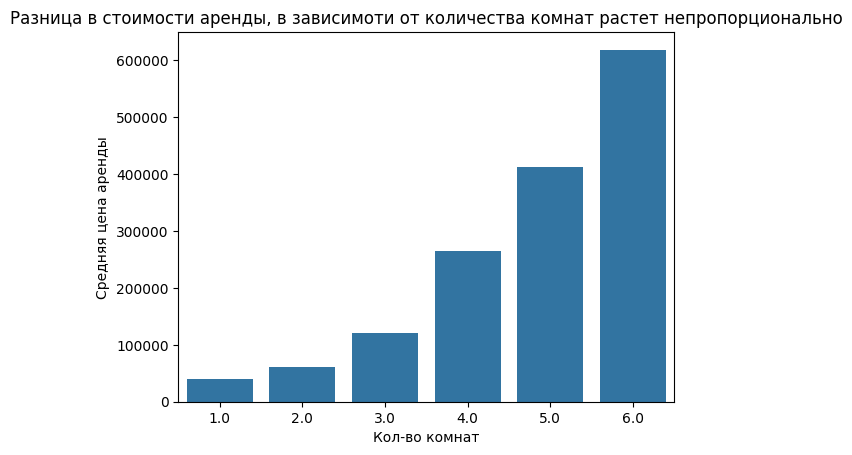

In [14]:
df['Цена_месяц'] = df['Цена'].str.extract(r'(\d+)')[0].astype(float)

avg_price = df.groupby('Количество_комнат_без_типов')['Цена_месяц'].mean().reset_index()
sns.barplot(x='Количество_комнат_без_типов', y='Цена_месяц', data=avg_price);
plt.title('Разница в стоимости аренды, в зависимоти от количества комнат растет непропорционально')
plt.xlabel('Кол-во комнат')
plt.ylabel('Средняя цена аренды');

/tmp/ipykernel_78396/4086004404.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_remont_cleaned = df.groupby('Ремонт', group_keys=False).apply(remove_outliers, 'Чистая_цена').reset_index(drop=True)


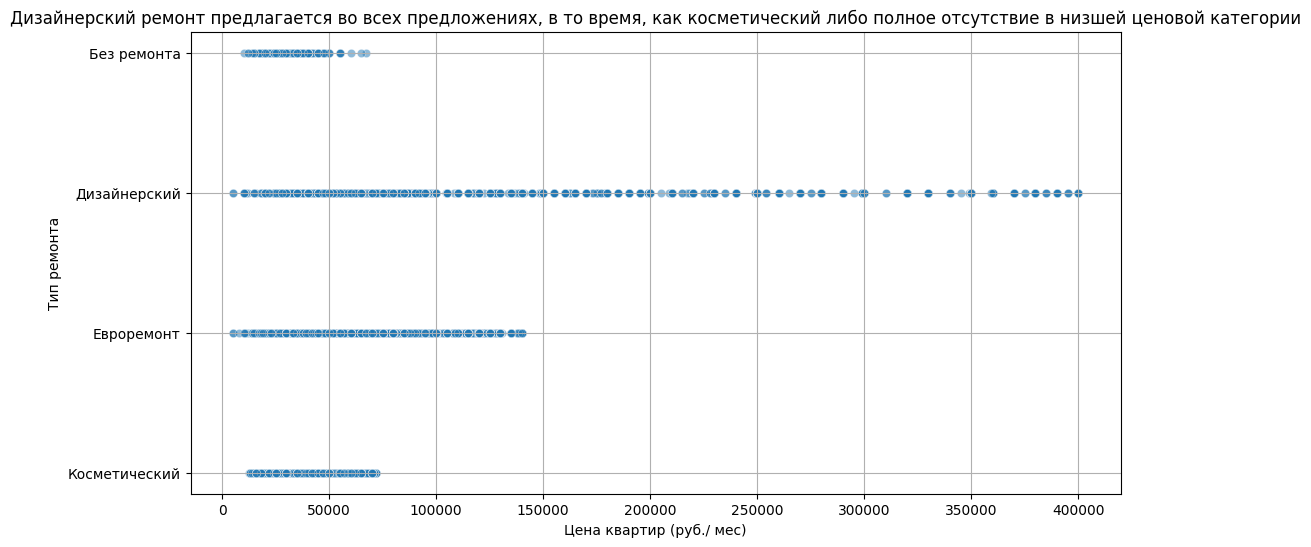

In [17]:
df['Чистая_цена'] = df['Цена'].str.split().str[0]
df['Чистая_цена'] = pd.to_numeric(df['Чистая_цена'])

df_remont_cleaned = df.groupby('Ремонт', group_keys=False).apply(remove_outliers, 'Чистая_цена').reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_remont_cleaned, x='Чистая_цена', y='Ремонт', alpha=0.5)
plt.title('Дизайнерский ремонт предлагается во всех предложениях, в то время, как косметический либо полное отсутствие в низшей ценовой категории')
plt.xlabel('Цена квартир (руб./ мес)')
plt.ylabel('Тип ремонта')
plt.grid(True)

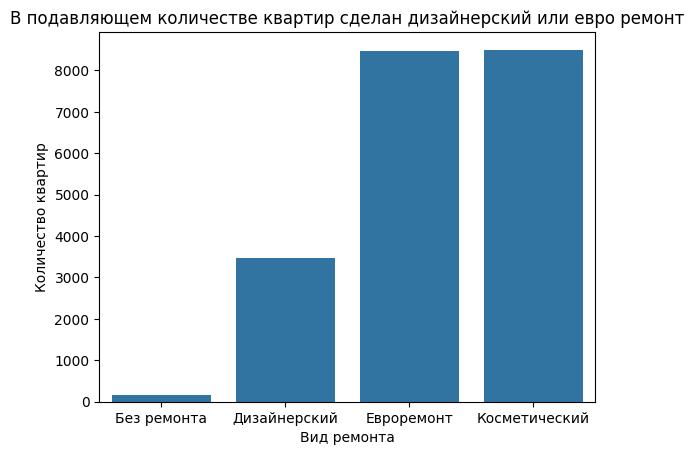

In [152]:
interior = df.groupby('Ремонт')['Ремонт'].count()
sns.barplot(x=interior.index, y=interior.values)
plt.xlabel('Вид ремонта')
plt.ylabel('Количество квартир')
plt.title('В подавляющем количестве квартир сделан дизайнерский или евро ремонт');

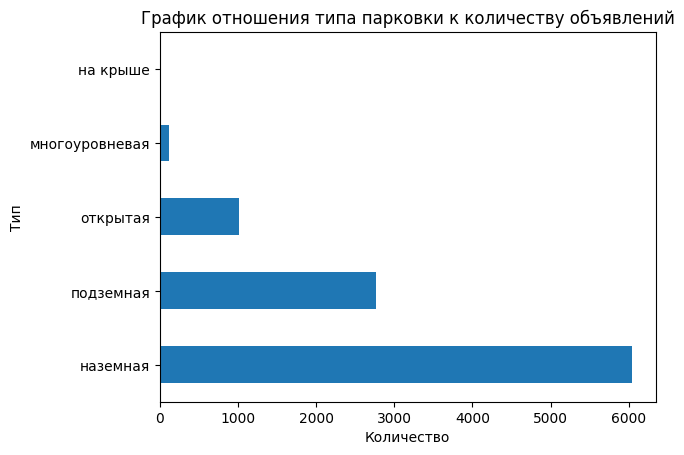

In [122]:
parking_df = df.groupby('Парковка').size().sort_values(ascending=False).reset_index(name='Count')

parking_df.plot(kind='barh', x='Парковка', legend=None, xlabel='Количество', ylabel='Тип', title='График отношения типа парковки к количеству объявлений');


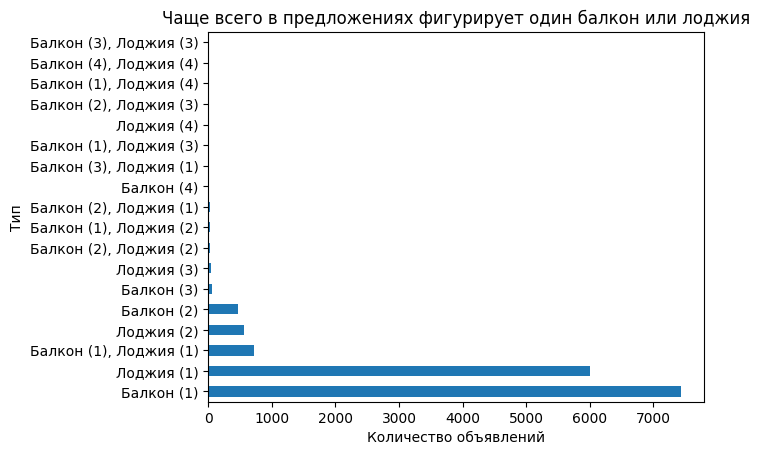

In [132]:
balcony_df = df.groupby('Балкон').size().sort_values(ascending=False).reset_index(name='Count')

balcony_df.plot(kind='barh', x='Балкон', legend=None, xlabel='Количество объявлений', ylabel='Тип', title='Чаще всего в предложениях фигурирует один балкон или лоджия');


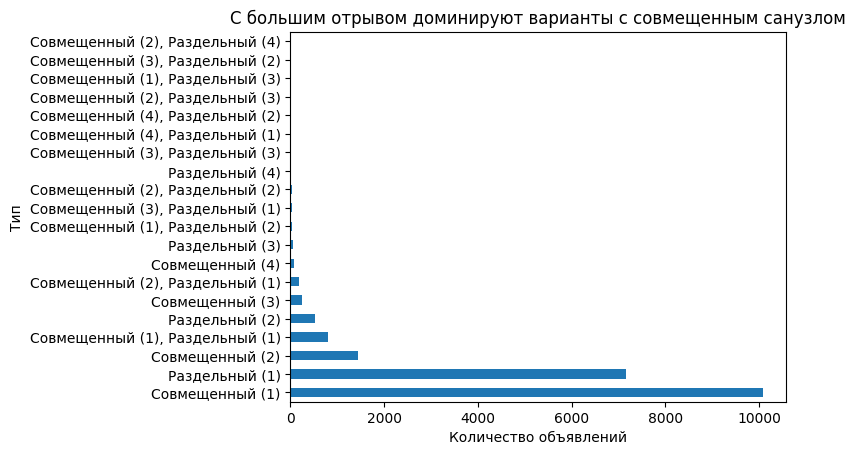

In [150]:
bath_df = df.groupby('Санузел').size().sort_values(ascending=False).reset_index(name='Count')

bath_df.plot(kind='barh', x='Санузел', legend=None, xlabel='Количество объявлений', ylabel='Тип', title='С большим отрывом доминируют варианты с совмещенным санузлом');

In [170]:
kids_pets = df.groupby('Можно с детьми/животными')['Можно с детьми/животными'].count()
elevator = df.groupby('Лифт')['Лифт'].count()
trash = df.groupby('Мусоропровод')['Мусоропровод'].count()
floor_split = df['Дом'].str.split('/').str[0]
floor = df.groupby(floor_split)['Дом'].count()

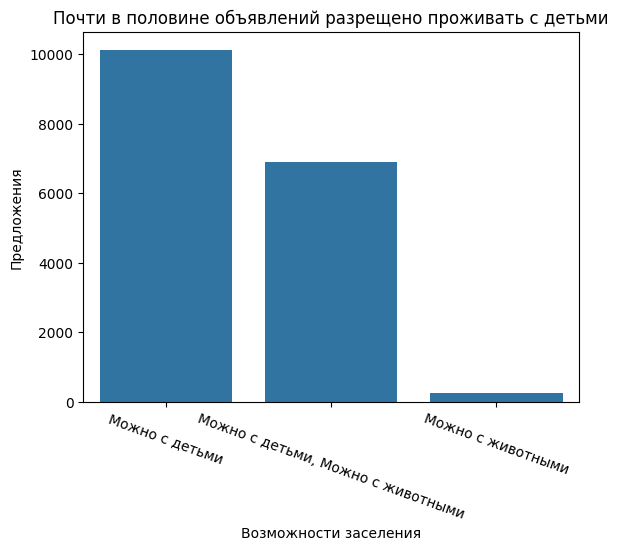

In [149]:
sns.barplot(x=kids_pets.index, y=kids_pets.values)
plt.xlabel('Возможности заселения')
plt.ylabel('Предложения')
plt.title('Почти в половине объявлений разрещено проживать с детьми')
plt.xticks(rotation=-20);

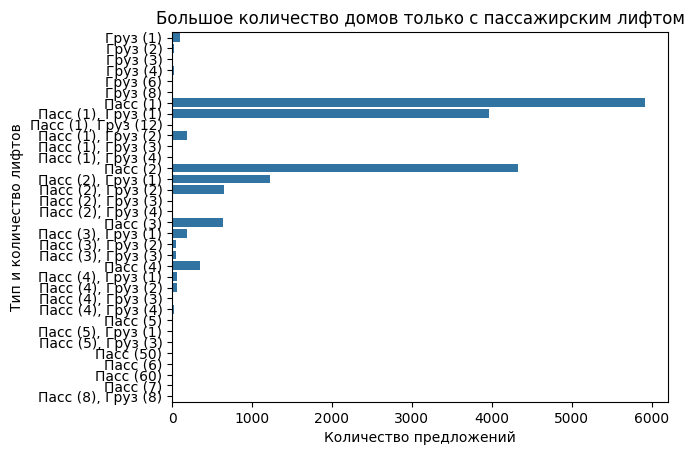

In [156]:
sns.barplot(y=elevator.index, x=elevator.values)
plt.ylabel('Тип и количество лифтов')
plt.xlabel('Количество предложений')
plt.title('Большое количество домов только с пассажирским лифтом');

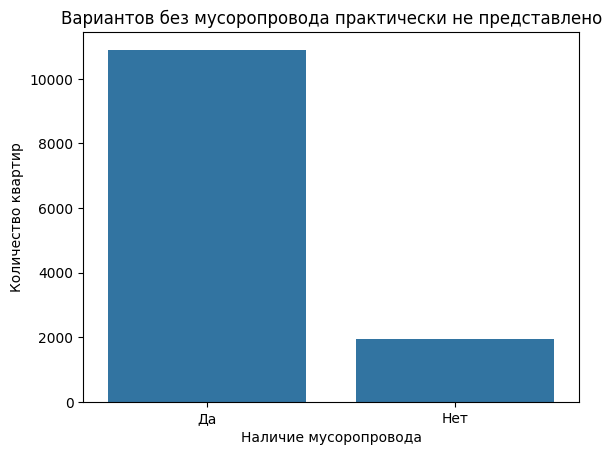

In [154]:
sns.barplot(x=trash.index, y=trash.values)
plt.xlabel('Наличие мусоропровода')
plt.ylabel('Количество квартир')
plt.title('Вариантов без мусоропровода практически не представлено');

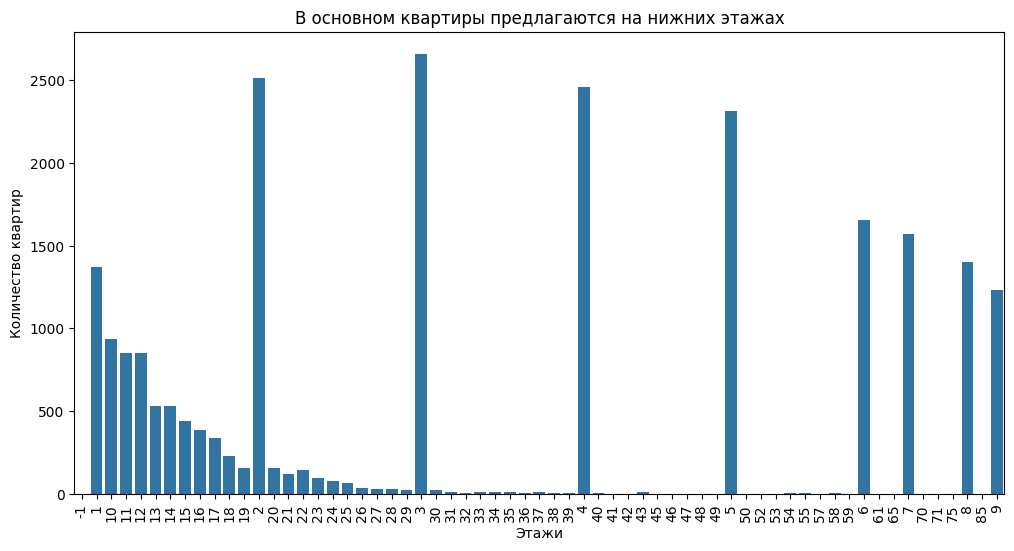

In [175]:
plt.figure(figsize=(12, 6))
sns.barplot(x=floor.index, y=floor.values)
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.title('В основном квартиры предлагаются на нижних этажах')
plt.xticks(rotation=90);